In [1]:
# 確率変数の分布の特性値

# 主な分布の特性値としては、期待値、中央値、最頻値などの位置の指標と
# 分散、四分位範囲などの散らばりの指標がある

In [2]:
# 中央値と最頻値は以下のように定義される
# 中央値：P(X<=a)=0.5となるa
# 最頻値：確率変数Xの確率密度関数f(x)が最大となるx

import statistics

l = [10, 1, 3, 7, 1, 5, 6, 8, 9, 2, 2, 2]
median = statistics.median(l)
print(f"中央値:{median}")

mode = statistics.mode(l)
print(f"最頻値:{mode}")

# 左右対称かつ単峰の分布の場合、期待値、中央値、最頻値は全て一致する
# 右に裾が長い場合は、最頻値<中央値<期待値で、
# 左に裾が長い場合は、期待値<中央値<最頻値となる

中央値:4.0
最頻値:2


In [3]:
# 標準偏差と四分位範囲は以下のように定義される
# 標準偏差：√V[X]
# 四分位範囲：P(X<=b)=0.75となるb - P(X<=c)=0.25となるc(第3四分位数-第1四分位数)

variance = statistics.pvariance(l)
pstdev = variance**0.5
print(f"標準偏差:{pstdev}")

pstdev2 = statistics.pstdev(l)
print(f"標準偏差:{pstdev2} *pstdevで直接計算")

import numpy as np
q75, q25 = np.percentile(l, [75 ,25])
iqr = q75 - q25
print(f"第1四分位数:{q25}, 第3四分位数:{q75}, 四分位範囲:{iqr}")


標準偏差:3.1180478223116177
標準偏差:3.1180478223116177 *pstdevで直接計算
第1四分位数:2.0, 第3四分位数:7.25, 四分位範囲:5.25


In [4]:
# 非負値の確率変数に対する散らばりの指標としては変動係数がある
# 大きな値を取りやすい確率変数の標準偏差は大きくなりやすく、
# 小さな値しか取らない確率変数の標準偏差は小さくなりやすい
# そのような異なる単位のデータの散らばりを比較する際に変動係数は用いられる
# 変動係数：√V[X]/E[X](標準偏差/期待値)

mean = statistics.mean(l)
cv = pstdev/mean
print(f"標準偏差:{pstdev:.3f}, 期待値:{mean:.3f}, 変動係数:{cv:.3f}")

標準偏差:3.118, 期待値:4.667, 変動係数:0.668


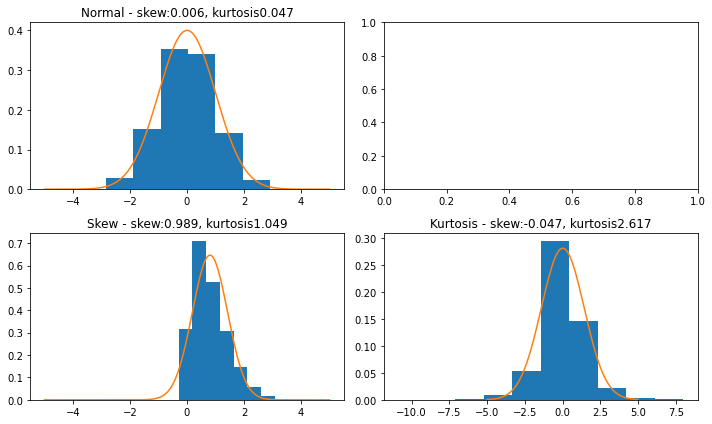

In [5]:
# その他の散らばりの特性値として歪度、尖度がある
# 歪度：E[(X-E[X])**3]/(V[X])**(3/2)
# 尖度：E[(X-E[X])**4]/(V[X])**2
# 分布が左右対称であれば歪度は0とな理、右に裾が長ければ正、左なら負となる傾向がある
# 尖度は必ず0以上であり、正規分布の場合は3となるため、3よりも大きいかどうかで検討することが多い
# また、尖度については正規分布を0として、E[(X-E[X])**4]/(V[X])**2-3と定義されることもある

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import laplace
from scipy.stats import kurtosis
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import skewnorm

norm_data = norm.rvs(loc=0, scale=1, size=10000) # 正規分布データ
skew_data = skewnorm.rvs(10, size=10000) # 歪度データ
kurtosis_data = laplace.rvs(size=10000) # 尖度データ

x = np.linspace(-5, 5, 1000)
norm_pdf = norm.pdf(x, loc=norm_data.mean(), scale=norm_data.std())
skew_pdf = norm.pdf(x, loc=skew_data.mean(), scale=skew_data.std())
kurtosis_pdf = norm.pdf(x, loc=kurtosis_data.mean(), scale=kurtosis_data.std())

fig, ax = plt.subplots(2, 2, figsize=(10.0, 6.0))
ax[0,0].hist(norm_data, density=True)
ax[0,0].plot(x, norm_pdf)
ax[0,0].set_title(f"Normal - skew:{skew(norm_data):.3f}, kurtosis{kurtosis(norm_data):.3f}")

ax[1,0].hist(skew_data, density=True)
ax[1,0].set_title(f"Skew - skew:{skew(skew_data):.3f}, kurtosis{kurtosis(skew_data):.3f}")
ax[1,0].plot(x, skew_pdf)

ax[1,1].hist(kurtosis_data, density=True)
ax[1,1].set_title(f"Kurtosis - skew:{skew(kurtosis_data):.3f}, kurtosis{kurtosis(kurtosis_data):.3f}")
ax[1,1].plot(x, kurtosis_pdf)

plt.tight_layout()
plt.show()


共分散:0.09921632653061224
相関係数:0.7425466856651597


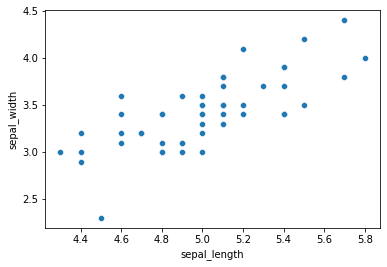

In [6]:
# 同時分布の特性値

# 2つの確率変数X,Yの関係を表す概念として相関がある
# また、確率変数X,Yの相関を示す指標として、共分散や相関係数がある
# 共分散：Cov[X,Y] = E[(X-E[X])*(Y-E[Y])] = E[XY]-E[X]*E[Y]
# 相関係数：p[X,Y] = Cov[X,Y]/(√V[X]*V[Y]) (-1<=p[X,Y]<=1)
# 相関係数が1の時、X,Yには一次式の関係がある
# 一方でX,Yが独立であれば、共分散も相関係数も0になる

import seaborn as sns
df_iris = sns.load_dataset('iris')
sepal_length = df_iris[df_iris['species']=='setosa']['sepal_length']
sepal_width = df_iris[df_iris['species']=='setosa']['sepal_width']

cov = np.cov(sepal_length, sepal_width)[0, 1]
print(f'共分散:{cov}')
corr = np.corrcoef(sepal_length, sepal_width)[0, 1]
print(f'相関係数:{corr}')

sns.scatterplot(x=sepal_length, y=sepal_width)
plt.show()


In [7]:
# 確率変数X,Yそれぞれに別の確率変数Zが影響を与えている場合、XとYの相関は強くなりやすい
# このような相関のことを擬似相関という。この場合はZの影響を取り除いた相関を考えたい
# ある変数の影響を除いた相関係数のことを偏相関係数という

import pingouin as pg
#偏相関行列を計算
partial_corr_matrix = pg.pcorr(df_iris)
partial_corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.628571,0.719066,-0.339617
sepal_width,0.628571,1.000000,-0.615292,0.352626
petal_length,0.719066,-0.615292,1.000000,0.870770
petal_width,-0.339617,0.352626,0.870770,1.000000


In [8]:
# 特性値の性質

# 期待値に関する性質
# E[a*X+b*Y+c] = a*E[X]+b*E[Y]+c が成立する
# またX,Yが独立であれば、E[X*Y] = E[X]*E[Y] が成立する
a = 2.0
b = 3.0
c = 10.0
X = np.array([1, 2, 3, 4])
Y = np.array([5, 6, 7, 8])

E_all = np.mean(a*X+b*Y+c)
E_div = a*np.mean(X)+b*np.mean(Y)+c
print(f"期待値1:{E_all}, 期待値2:{E_div}") # 一致する

# 分散に関する性質
# V[a*X+b] = a**2*V[X]
# V[X±Y] = V[X]+V[Y]±s*Cov[X,Y] が成り立つ
# この時X,Yが独立であれば、V[X±Y] = V[X]+V[Y]である
V_all = np.var(a*X+b)
V_div = a**2*np.var(X)
print(f"分散1:{V_all}, 分散2:{V_div}") # 一致する

期待値1:34.5, 期待値2:34.5
分散1:5.0, 分散2:5.0


In [9]:
# データの特性値

# 実際に観測されたデータに対する特性値も同様に計算される
# これまでの算術平均以外に、加重平均、幾何平均、調和平均がある
# 加重平均は、観測地xiが割合wiで得られる場合の全平均
# 幾何平均は、積に関する平均。調和平均は、割合の平均を意味する
# 加重平均：Σ(wi*xi) *重み...w1,w2,..wn
# 幾何平均：(x1*xn*...*xn)**(1/n)
# 調和平均：(1/n)*Σ(1/xi)の逆数

from scipy.stats.mstats import gmean
from scipy.stats import hmean

data = np.array([5,5,10,10,20,20,30])
weights = np.array([0.25, 0.25, 0.1, 0.1, 0.1, 0.1, 0.1])

normal_mean = np.mean(data)
print(f"算術平均:{normal_mean:.3f}")

weighted_mean = np.average(data, weights=weights)
print(f"加重平均:{weighted_mean:.3f}")

geometric_mean = gmean(data)
print(f"幾何平均:{geometric_mean:.3f}")

harmonic_mean = hmean(data)
print(f"調和平均:{harmonic_mean:.3f}")

算術平均:14.286
加重平均:11.500
幾何平均:11.699
調和平均:9.545


In [10]:
# 平均ベクトルと分散共分散行列

# 多次元の確率ベクトルの場合、期待値もベクトルとなる
# また、ベクトル同士の共分散は分散共分散行列となり、
# ベクトルの相関係数を要素とする行列を相関行列と呼ぶ

print("--- 平均ベクトル ---")
print(df_iris.mean(numeric_only=True))

print("--- 分散共分散行列 ---")
print(df_iris.cov())

print("--- 相関行列 ---")
print(df_iris.corr())

--- 平均ベクトル ---
sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64
--- 分散共分散行列 ---
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006
--- 相関行列 ---
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000
